# Vaccines and patient characteristics

### Import libraries and data

The datasets used for this report are created using the study definition [`/analysis/study_definition.py`](../analysis/study_definition.py), using codelists referenced in [`/codelists/codelists.txt`](../codelists/codelists.txt). 

In [1]:
%load_ext autoreload
%autoreload 2
 
import pandas as pd
import numpy as np
import subprocess
from IPython.display import display, Markdown, HTML

suffix = "_tpp"

# get current branch
current_branch = subprocess.run(["git", "rev-parse", "--abbrev-ref", "HEAD"], capture_output=True).stdout.decode("utf8").strip()

### Import our custom functions

In [2]:
# import custom functions from 'lib' folder
import sys
sys.path.append('../lib/')

In [3]:
from data_processing import load_data

In [4]:
from report_results import find_and_save_latest_date, create_output_dirs

In [5]:
# create output directories to save files into 
savepath, savepath_figure_csvs, savepath_table_csvs = create_output_dirs()

### Load and Process the raw data 

In [6]:
df = load_data()

In [7]:
latest_date, formatted_latest_date = find_and_save_latest_date(df, savepath=savepath)

In [8]:
print(f"Latest Date: {formatted_latest_date}")

Latest Date: 05 Mar 2021


### Summarise by group and demographics at latest date

#### Calculate cumulative sums at each date and select latest date + previous figures for comparison

In [9]:
from report_results import cumulative_sums

In [10]:
# population subgroups - in a dict to indicate which field to filter on


population_subgroups = {"80+":"community_ageband",
        "70-79":"community_ageband", 
        "care home":"community_ageband", 
        "shielding (aged 16-69)":"shielded", 
        "65-69": "community_ageband",  
        "LD (aged 16-64)": "LD_group",  
        "under 65s, not in other eligible groups shown":"other" 
        # NB the "other" group must contain phrase "not in other eligible groups"
        }

groups = population_subgroups.keys()

# dictionary mapping population subgroups to a list of demographic/clinical factors to include for that group
features_dict = {"other":    ["sex","ageband", "ethnicity_6_groups", "ethnicity_16_groups","imd_categories",
                              "bmi","chronic_cardiac_disease", "current_copd", "dmards","ssri"],
                 "care home": ["sex", "ageband_5yr", "ethnicity_6_groups", "dementia"],
                 "shielding (aged 16-69)": ["newly_shielded_since_feb_15","sex", "ageband", "ethnicity_6_groups", "imd_categories",
                                           "LD"],
                 "65-69":    ["sex","ethnicity_6_groups","ethnicity_16_groups", "imd_categories", 
                              "bmi", "chronic_cardiac_disease", "current_copd", "dmards", "dementia",
                              "psychosis_schiz_bipolar","LD","ssri",
                              "chemo_or_radio", "lung_cancer", "cancer_excl_lung_and_haem", "haematological_cancer"],
                 "LD (aged 16-64)":  ["sex", "ageband_5yr", "ethnicity_6_groups"],
                 "DEFAULT":   ["sex","ageband_5yr","ethnicity_6_groups","ethnicity_16_groups", "imd_categories", 
                              "bmi", "chronic_cardiac_disease", "current_copd", "dialysis", "dmards", "dementia",
                              "psychosis_schiz_bipolar","LD","ssri",
                              "chemo_or_radio", "lung_cancer", "cancer_excl_lung_and_haem", "haematological_cancer"]
                }


In [11]:
df_dict_cum = cumulative_sums(df, groups_of_interest=population_subgroups, features_dict=features_dict, latest_date=latest_date)

### Cumulative vaccination figures - overall

In [12]:
from report_results import make_vaccine_graphs

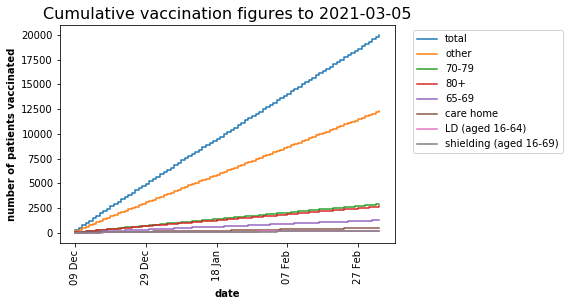

In [13]:
make_vaccine_graphs(df, latest_date=latest_date, savepath=savepath, savepath_figure_csvs=savepath_figure_csvs, suffix=suffix)

### Reports 

In [14]:
from report_results import summarise_data_by_group

In [15]:
summarised_data_dict = summarise_data_by_group(df_dict_cum, latest_date=latest_date, groups=groups)

### Proportion of each eligible population vaccinated to date

In [16]:
from report_results import create_summary_stats, create_detailed_summary_uptake

In [17]:
summ_stat_results = create_summary_stats(df, summarised_data_dict, formatted_latest_date, groups=groups, savepath=savepath, suffix=suffix)

In [18]:
# display the results of the summary stats in notebook
for x in summ_stat_results.keys():
    display(Markdown(f"{x}: {summ_stat_results[x]}"))
    
display(Markdown(f"*\n figures rounded to nearest 7"))

### As at 05 Mar 2021: 

**Total** population vaccinated in TPP: 19,999

**80+** population vaccinated: 2,667 (39.9% of 6,685)

**70-79** population vaccinated: 2,891 (39.5% of 7,315)

**care home** population vaccinated: 490 (42.3% of 1,155)

**shielding (aged 16-69)** population vaccinated: 161 (38.2% of 427)

**65-69** population vaccinated: 1,260 (41.3% of 3,059)

**LD (aged 16-64)** population vaccinated: 315 (40.1% of 791)

**under 65s, not in other eligible groups shown** population vaccinated: 12,327

#### Vaccine types and second doses: 

Second doses (% of all vaccinated): 4,998 (25.0%)

Oxford-AZ vaccines (% of all first doses): 7 (0.0%)

*
 figures rounded to nearest 7

# Detailed summary of coverage among population groups as at latest date

In [19]:
create_detailed_summary_uptake(summarised_data_dict, formatted_latest_date, 
                               groups=population_subgroups.keys(),
                               savepath=savepath)

## 

## COVID vaccination rollout among **80+** population up to 05 Mar 2021

- 'Date projected to reach 90%' being 'unknown' indicates projection of >6mo (likely insufficient information)
- Patient counts rounded to the nearest 7

vaccinated  \
category                  group                                             
overall                   overall                                    2670   
sex                       F                                          1372   
                          M                                          1295   
ageband_5yr               0                                           147   
                          0-15                                        147   
                          16-29                                       147   
                          30-34                                       168   
                          35-39                                       189   
                          40-44                                       175   
                          45-49                                       175   
                          50-54                                       161   
                          55-59                                       175   
                          60-64                                       168   
                          65-69                                       161   
                          70-74                                       161   
                          75-79                                       189   
                          80-84                                       154   
                          85-89                                       175   
                          90+                                         189   
ethnicity_6_groups        Black                                       483   
                          Mixed                                       441   
                          Other                                       469   
                          South Asian                                 434   
                          Unknown                                     392   
                          White                                       448   
ethnicity_16_groups        African                                    147   
                           Bangladeshi or British Bangladeshi         140   
                           Caribbean                                  147   
                           Chinese                                    161   
                           Other                                      140   
                           Other Asian                                140   
                          British or Mixed British                    112   
                          Indian or British Indian                    133   
                          Irish                                       140   
                          Other Black                                 140   
                          Other White                                 154   
                          Other mixed                                 133   
                          Pakistani or British Pakistani              154   
                          Unknown                                     406   
                          White + Asian                               147   
                          White + Black African                       119   
                          White + Black Caribbean                     154   
imd_categories            1 Most deprived                             511   
                          2                                           546   
                          3                                           518   
                          4                                           469   
                          5 Least deprived                            518   
                          Unknown                                     112   
bmi                       30+                                         763   
                          under 30                                   1904   
chronic_cardiac_disease   no                               

## 

## COVID vaccination rollout among **70-79** population up to 05 Mar 2021

- 'Date projected to reach 90%' being 'unknown' indicates projection of >6mo (likely insufficient information)
- Patient counts rounded to the nearest 7

vaccinated  \
category                  group                                             
overall                   overall                                    2893   
sex                       F                                          1498   
                          M                                          1393   
ageband_5yr               0                                           182   
                          0-15                                        175   
                          16-29                                       196   
                          30-34                                       217   
                          35-39                                       189   
                          40-44                                       203   
                          45-49                                       161   
                          50-54                                       196   
                          55-59                                       182   
                          60-64                                       175   
                          65-69                                       175   
                          70-74                                       168   
                          75-79                                       189   
                          80-84                                       161   
                          85-89                                       168   
                          90+                                         161   
ethnicity_6_groups        Black                                       504   
                          Mixed                                       497   
                          Other                                       469   
                          South Asian                                 497   
                          Unknown                                     434   
                          White                                       490   
ethnicity_16_groups        African                                    154   
                           Bangladeshi or British Bangladeshi         133   
                           Caribbean                                  154   
                           Chinese                                    154   
                           Other                                      147   
                           Other Asian                                175   
                          British or Mixed British                    133   
                          Indian or British Indian                    161   
                          Irish                                       140   
                          Other Black                                 175   
                          Other White                                 154   
                          Other mixed                                 154   
                          Pakistani or British Pakistani              140   
                          Unknown                                     469   
                          White + Asian                               154   
                          White + Black African                       154   
                          White + Black Caribbean                     140   
imd_categories            1 Most deprived                             560   
                          2                                           532   
                          3                                           574   
                          4                                           511   
                          5 Least deprived                            567   
                          Unknown                                     147   
bmi                       30+                                         868   
                          under 30                                   2023   
chronic_cardiac_disease   no                               

## 

## COVID vaccination rollout among **care home** population up to 05 Mar 2021

- 'Date projected to reach 90%' being 'unknown' indicates projection of >6mo (likely insufficient information)
- Patient counts rounded to the nearest 7

vaccinated  percent  total  \
category           group                                     
overall            overall             488     42.3   1155   
sex                F                   266     45.2    588   
                   M                   224     40.0    560   
ageband_5yr        0                    35     50.0     70   
                   0-15                 28     40.0     70   
                   16-29                28     50.0     56   
                   30-34                28     36.4     77   
                   35-39                35     45.5     77   
                   40-44                35     41.7     84   
                   45-49                35     45.5     77   
                   50-54                35     41.7     84   
                   55-59                28     44.4     63   
                   60-64                35     45.5     77   
                   65-69                35     45.5     77   
                   70-74                35     45.5     77   
                   75-79                14     20.0     70   
                   80-84                35     45.5     77   
                   85-89                35     55.6     63   
                   90+                  28     50.0     56   
ethnicity_6_groups Black                84     42.9    196   
                   Mixed                84     41.4    203   
                   Other                84     41.4    203   
                   South Asian          77     39.3    196   
                   Unknown              84     46.2    182   
                   White                70     40.0    175   
dementia           no                  483     42.3   1141   
                   yes                   0      0.0      7   

                               vaccinated 7d previous (percent)  \
category           group                                          
overall            overall                                 38.5   
sex                F                                       41.7   
                   M                                       36.2   
ageband_5yr        0                                         40   
                   0-15                                      40   
                   16-29                                     50   
                   30-34                                   27.3   
                   35-39                                   36.4   
                   40-44                                   33.3   
                   45-49                                   36.4   
                   50-54                                   33.3   
                   55-59                                   44.4   
                   60-64                                   45.5   
                   65-69                                   36.4   
                   70-74                                   36.4   
                   75-79                                     20   
                   80-84                                   45.5   
                   85-89                                   44.4   
                   90+                                     37.5   
ethnicity_6_groups Black                                   39.3   
                   Mixed                                   37.9   
                   Other                                   37.9   
                   South Asian                             32.1   
                   Unknown                                 38.5   
                   White                                     40   
dementia           no                                      38.7   
                   yes                                        0   

                               Uptake over last 7d (percent)  \
category           group                                       
overall            overall                               3.8   
sex                F                                     3.5   
                   M             

## 

## COVID vaccination rollout among **shielding (aged 16-69)** population up to 05 Mar 2021

- 'Date projected to reach 90%' being 'unknown' indicates projection of >6mo (likely insufficient information)
- Patient counts rounded to the nearest 7

vaccinated  percent  total  \
category                    group                                          
overall                     overall                  163     38.2    427   
newly_shielded_since_feb_15 no                       161     38.3    420   
                            yes                        0      NaN      0   
sex                         F                         84     37.5    224   
                            M                         77     37.9    203   
ageband                     16-29                     28     50.0     56   
                            30-39                     21     37.5     56   
                            40-49                     28     44.4     63   
                            50-59                     21     42.9     49   
                            60-69                     14     28.6     49   
                            70-79                     35     35.7     98   
                            80+                       14     25.0     56   
ethnicity_6_groups          Black                     28     40.0     70   
                            Mixed                     28     44.4     63   
                            Other                     21     33.3     63   
                            South Asian               21     30.0     70   
                            Unknown                   28     44.4     63   
                            White                     35     38.5     91   
imd_categories              1 Most deprived           21     30.0     70   
                            2                         42     42.9     98   
                            3                         28     33.3     84   
                            4                         35     41.7     84   
                            5 Least deprived          28     36.4     77   
                            Unknown                    7     33.3     21   
LD                          no                       161     38.3    420   
                            yes                        0      0.0      7   

                                             vaccinated 7d previous (percent)  \
category                    group                                               
overall                     overall                                      35.8   
newly_shielded_since_feb_15 no                                             35   
                            yes                                           NaN   
sex                         F                                            34.4   
                            M                                            37.9   
ageband                     16-29                                          50   
                            30-39                                          25   
                            40-49                                        44.4   
                            50-59                                        42.9   
                            60-69                                        28.6   
                            70-79                                        35.7   
                            80+                                            25   
ethnicity_6_groups          Black                                          30   
                            Mixed                                        44.4   
                            Other                                        33.3   
                            South Asian                                    30   
                            Unknown                                      44.4   
                            White                                        38.5   
imd_categories              1 Most deprived                                30   
                            2                                            35.7   
                            3                                            33.3   
                            4                         

## 

## COVID vaccination rollout among **65-69** population up to 05 Mar 2021

- 'Date projected to reach 90%' being 'unknown' indicates projection of >6mo (likely insufficient information)
- Patient counts rounded to the nearest 7

vaccinated  \
category                  group                                             
overall                   overall                                    1262   
sex                       F                                           665   
                          M                                           595   
ethnicity_6_groups        Black                                       224   
                          Mixed                                       217   
                          Other                                       203   
                          South Asian                                 224   
                          Unknown                                     189   
                          White                                       217   
ethnicity_16_groups        African                                     77   
                           Bangladeshi or British Bangladeshi          56   
                           Caribbean                                   63   
                           Chinese                                     70   
                           Other                                       63   
                           Other Asian                                 70   
                          British or Mixed British                     63   
                          Indian or British Indian                     70   
                          Irish                                        63   
                          Other Black                                  63   
                          Other White                                  70   
                          Other mixed                                  77   
                          Pakistani or British Pakistani               70   
                          Unknown                                     203   
                          White + Asian                                63   
                          White + Black African                        56   
                          White + Black Caribbean                      63   
imd_categories            1 Most deprived                             245   
                          2                                           238   
                          3                                           252   
                          4                                           245   
                          5 Least deprived                            210   
                          Unknown                                      63   
bmi                       30+                                         392   
                          under 30                                    868   
chronic_cardiac_disease   no                                         1246   
                          yes                                          14   
current_copd              no                                         1253   
                          yes                                           7   
dmards                    no                                         1246   
                          yes                                          21   
dementia                  no                                         1246   
                          yes                                          14   
psychosis_schiz_bipolar   no                                         1246   
                          yes                                          21   
LD                        no                                         1246   
                          yes                                          21   
ssri                      no                                         1246   
                          yes                                          14   
chemo_or_radio            no                                         1253   
                          yes                                           7   
lung_cancer               no                               

## 

## COVID vaccination rollout among **LD (aged 16-64)** population up to 05 Mar 2021

- 'Date projected to reach 90%' being 'unknown' indicates projection of >6mo (likely insufficient information)
- Patient counts rounded to the nearest 7

vaccinated  percent  total  \
category           group                                     
overall            overall             317     40.1    791   
sex                F                   154     39.3    392   
                   M                   168     42.1    399   
ageband_5yr        0                    28     50.0     56   
                   0-15                 21     42.9     49   
                   16-29                28     50.0     56   
                   30-34                14     28.6     49   
                   35-39                28     50.0     56   
                   40-44                21     42.9     49   
                   45-49                28     44.4     63   
                   50-54                21     37.5     56   
                   55-59                28     50.0     56   
                   60-64                14     40.0     35   
                   65-69                21     42.9     49   
                   70-74                21     42.9     49   
                   75-79                14     28.6     49   
                   80-84                 7     20.0     35   
                   85-89                14     33.3     42   
                   90+                  14     33.3     42   
ethnicity_6_groups Black                56     40.0    140   
                   Mixed                56     44.4    126   
                   Other                56     42.1    133   
                   South Asian          42     33.3    126   
                   Unknown              49     38.9    126   
                   White                63     45.0    140   

                               vaccinated 7d previous (percent)  \
category           group                                          
overall            overall                                 36.3   
sex                F                                       35.7   
                   M                                       36.8   
ageband_5yr        0                                         50   
                   0-15                                    42.9   
                   16-29                                   37.5   
                   30-34                                   14.3   
                   35-39                                     50   
                   40-44                                   42.9   
                   45-49                                   44.4   
                   50-54                                   37.5   
                   55-59                                   37.5   
                   60-64                                     40   
                   65-69                                   42.9   
                   70-74                                   28.6   
                   75-79                                   28.6   
                   80-84                                     20   
                   85-89                                   33.3   
                   90+                                     33.3   
ethnicity_6_groups Black                                     35   
                   Mixed                                   38.9   
                   Other                                   36.8   
                   South Asian                             33.3   
                   Unknown                                 33.3   
                   White                                     40   

                               Uptake over last 7d (percent)  \
category           group                                       
overall            overall                               3.8   
sex                F                                     3.6   
                   M                                     5.3   
ageband_5yr        0                                       0   
                   0-15                                    0   
                   16-29                                12.5   
                   30-34           

## 

## COVID vaccination rollout among **under 65s, not in other eligible groups shown** population up to 05 Mar 2021

- 'Date projected to reach 90%' being 'unknown' indicates projection of >6mo (likely insufficient information)
- Patient counts rounded to the nearest 7

vaccinated  \
category                group                                             
overall                 overall                                   12328   
sex                     F                                          6272   
                        M                                          6062   
ageband                 16-29                                      1568   
                        30-39                                      1631   
                        40-49                                      1666   
                        50-59                                      1666   
                        60-69                                      1680   
                        70-79                                      2716   
                        80+                                        1400   
ethnicity_6_groups      Black                                      1974   
                        Mixed                                      2142   
                        Other                                      2163   
                        South Asian                                2128   
                        Unknown                                    1834   
                        White                                      2093   
ethnicity_16_groups      African                                    644   
                         Bangladeshi or British Bangladeshi         644   
                         Caribbean                                  679   
                         Chinese                                    644   
                         Other                                      623   
                         Other Asian                                693   
                        British or Mixed British                    679   
                        Indian or British Indian                    644   
                        Irish                                       637   
                        Other Black                                 693   
                        Other White                                 630   
                        Other mixed                                 637   
                        Pakistani or British Pakistani              658   
                        Unknown                                    1869   
                        White + Asian                               665   
                        White + Black African                       637   
                        White + Black Caribbean                     658   
imd_categories          1 Most deprived                            2296   
                        2                                          2366   
                        3                                          2401   
                        4                                          2345   
                        5 Least deprived                           2331   
                        Unknown                                     588   
bmi                     30+                                        3661   
                        under 30                                   8666   
chronic_cardiac_disease no                                        12222   
                        yes                                         105   
current_copd            no                                        12194   
                        yes                                         133   
dmards                  no                                        12201   
                        yes                                         126   
ssri                    no                                        12222   
                        yes                                         105   

                                                            vaccinated 7d previous  \
category                group                                                        
overall                 overall                                

# Demographics time trend charts

In [20]:
from report_results import plot_dem_charts

## 
 ## COVID vaccination rollout among **80+** population up to 05 Mar 2021

### COVID vaccinations among **80+** population by **sex**

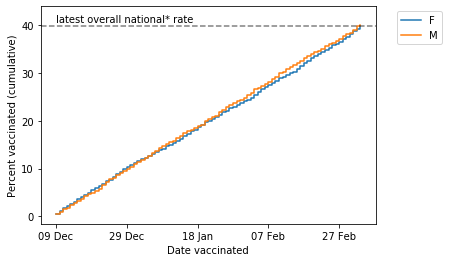

### COVID vaccinations among **80+** population by **ageband 5yr**

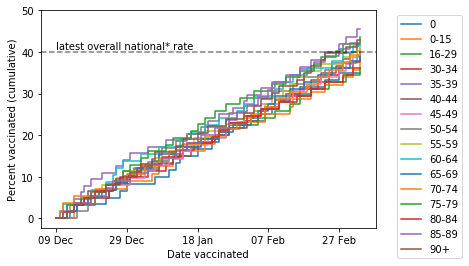

### COVID vaccinations among **80+** population by **ethnicity 6 groups**

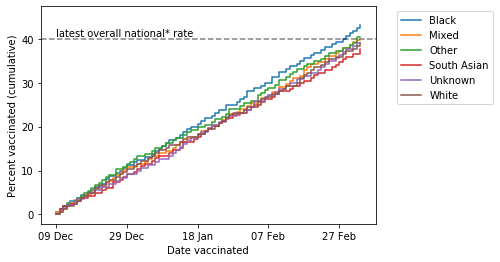

### COVID vaccinations among **80+** population by **imd categories**

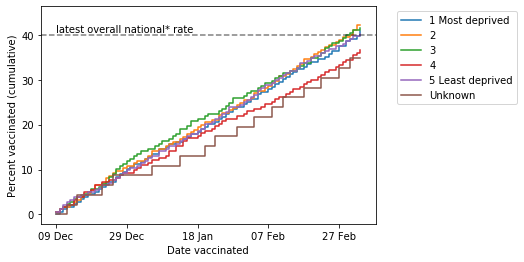

### COVID vaccinations among **80+** population by **bmi**

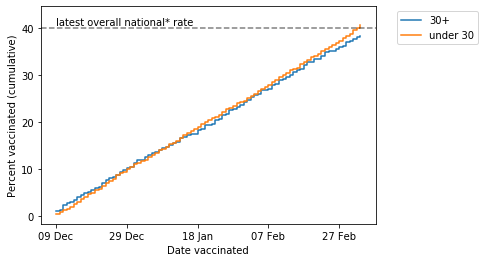

### COVID vaccinations among **80+** population by **chronic cardiac disease**

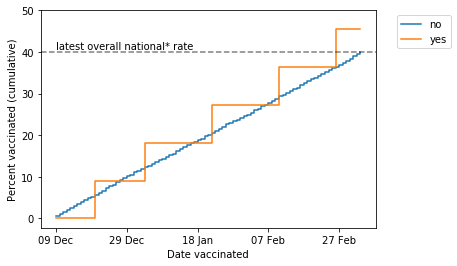

### COVID vaccinations among **80+** population by **current copd**

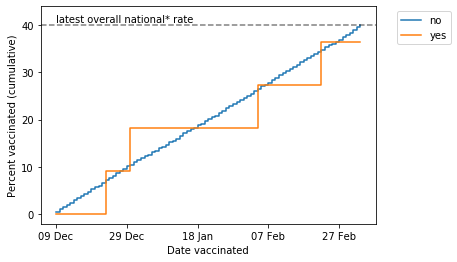

### COVID vaccinations among **80+** population by **dialysis**

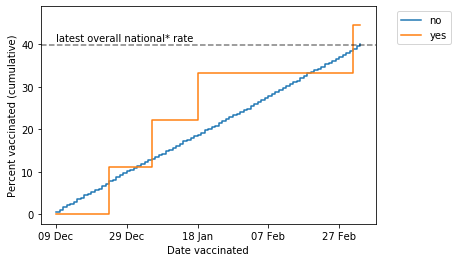

### COVID vaccinations among **80+** population by **dementia**

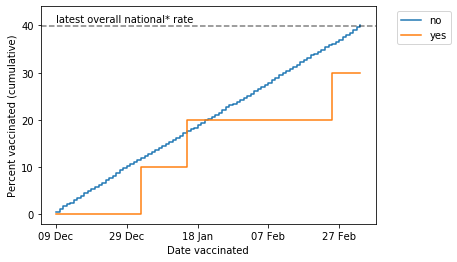

### COVID vaccinations among **80+** population by **psychosis schiz bipolar**

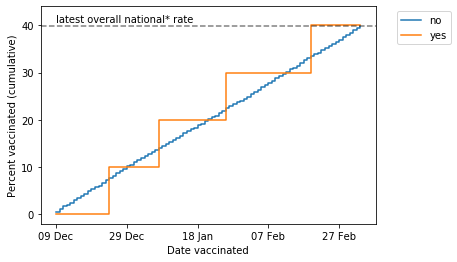

### COVID vaccinations among **80+** population by **LD**

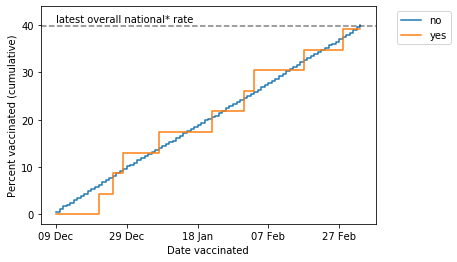

### COVID vaccinations among **80+** population by **ssri**

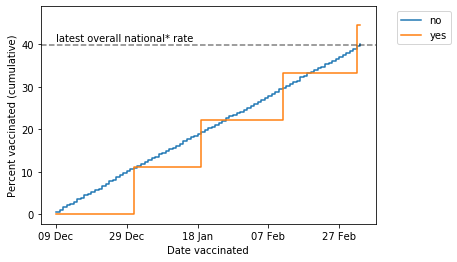

## 
 ## COVID vaccination rollout among **70-79** population up to 05 Mar 2021

### COVID vaccinations among **70-79** population by **sex**

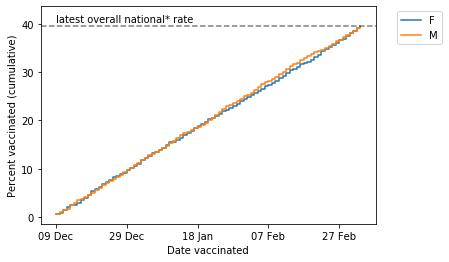

### COVID vaccinations among **70-79** population by **ageband 5yr**

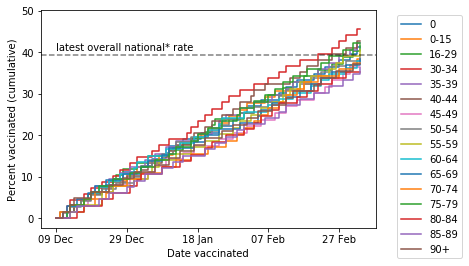

### COVID vaccinations among **70-79** population by **ethnicity 6 groups**

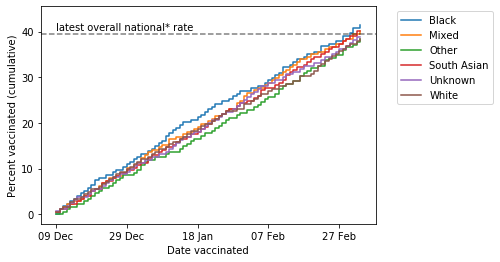

### COVID vaccinations among **70-79** population by **imd categories**

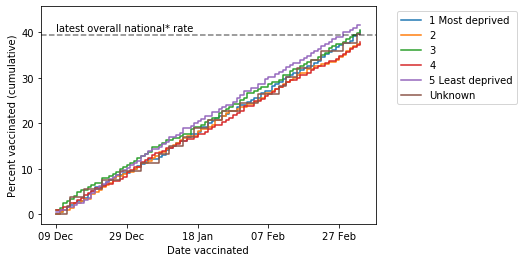

### COVID vaccinations among **70-79** population by **bmi**

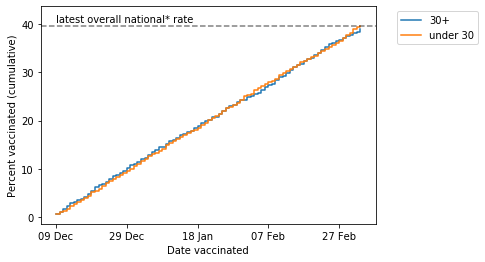

### COVID vaccinations among **70-79** population by **chronic cardiac disease**

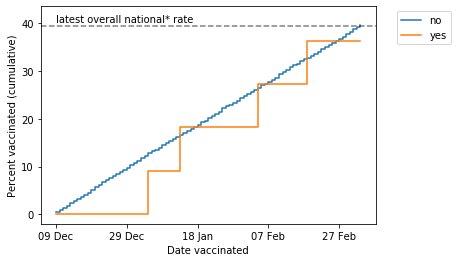

### COVID vaccinations among **70-79** population by **current copd**

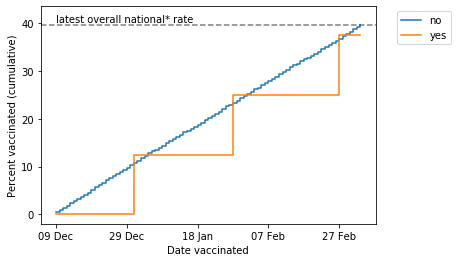

### COVID vaccinations among **70-79** population by **dialysis**

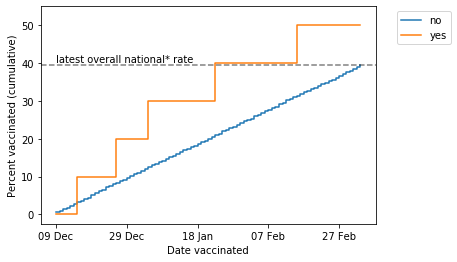

### COVID vaccinations among **70-79** population by **dementia**

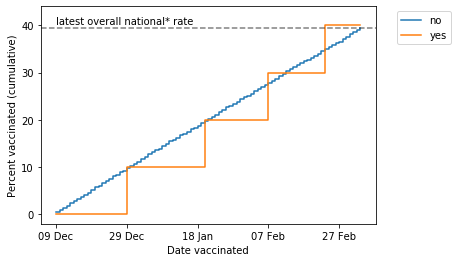

### COVID vaccinations among **70-79** population by **psychosis schiz bipolar**

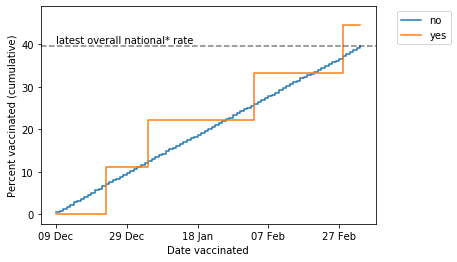

### COVID vaccinations among **70-79** population by **LD**

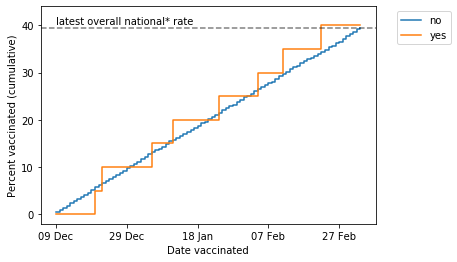

### COVID vaccinations among **70-79** population by **ssri**

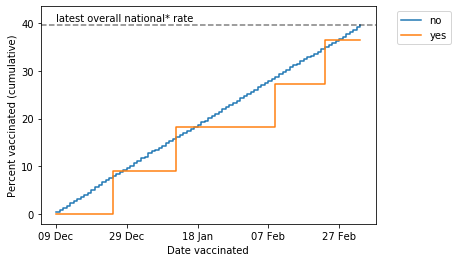

## 
 ## COVID vaccination rollout among **65-69** population up to 05 Mar 2021

### COVID vaccinations among **65-69** population by **sex**

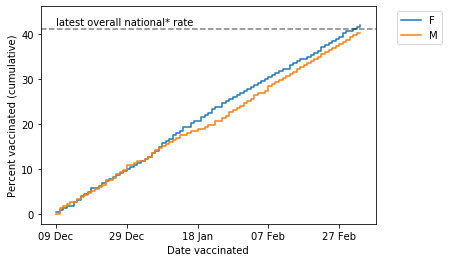

### COVID vaccinations among **65-69** population by **ethnicity 6 groups**

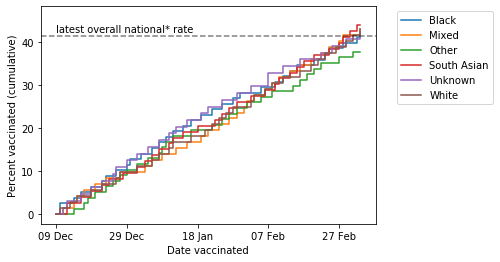

### COVID vaccinations among **65-69** population by **imd categories**

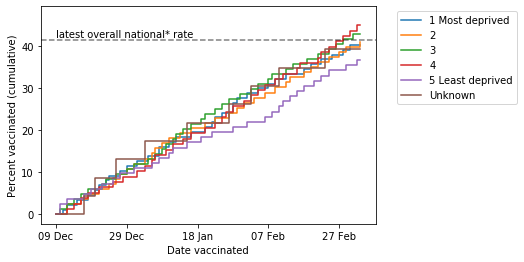

### COVID vaccinations among **65-69** population by **bmi**

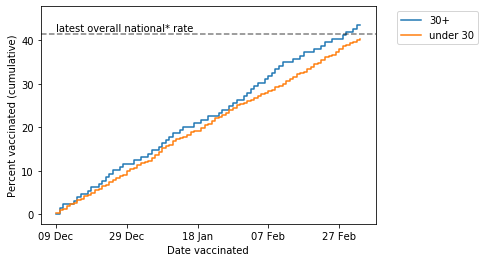

### COVID vaccinations among **65-69** population by **chronic cardiac disease**

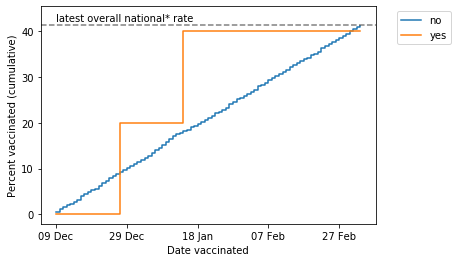

### COVID vaccinations among **65-69** population by **current copd**

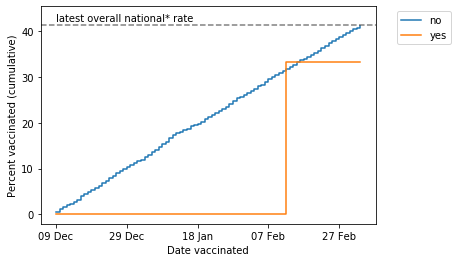

### COVID vaccinations among **65-69** population by **dementia**

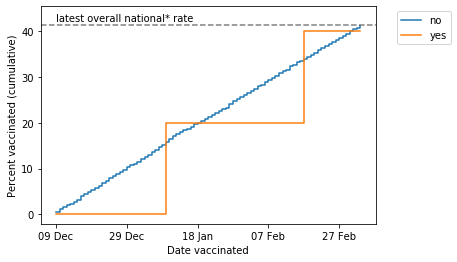

### COVID vaccinations among **65-69** population by **psychosis schiz bipolar**

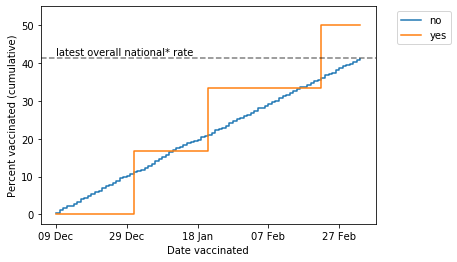

### COVID vaccinations among **65-69** population by **LD**

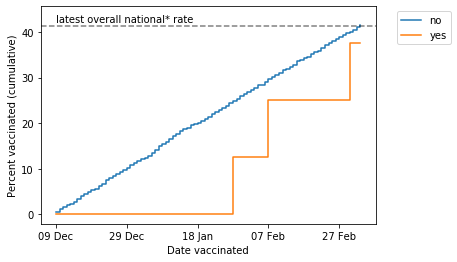

### COVID vaccinations among **65-69** population by **ssri**

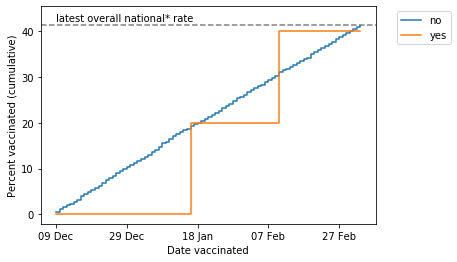

## 
 ## COVID vaccination rollout among **shielding (aged 16-69)** population up to 05 Mar 2021

### COVID vaccinations among **shielding (aged 16-69)** population by **newly shielded since feb 15**

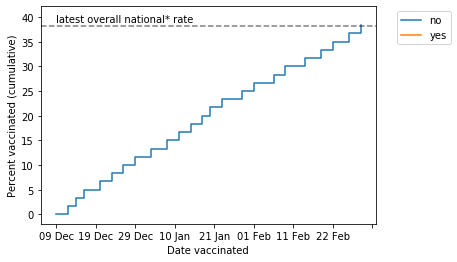

### COVID vaccinations among **shielding (aged 16-69)** population by **sex**

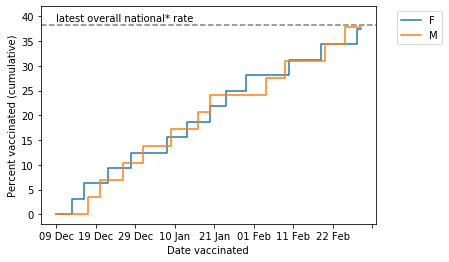

### COVID vaccinations among **shielding (aged 16-69)** population by **ageband**

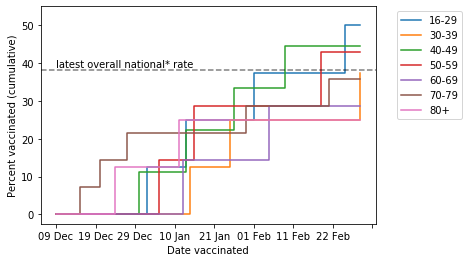

### COVID vaccinations among **shielding (aged 16-69)** population by **ethnicity 6 groups**

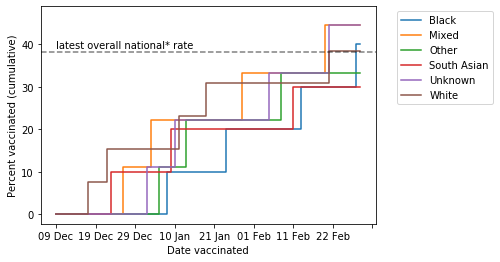

### COVID vaccinations among **shielding (aged 16-69)** population by **imd categories**

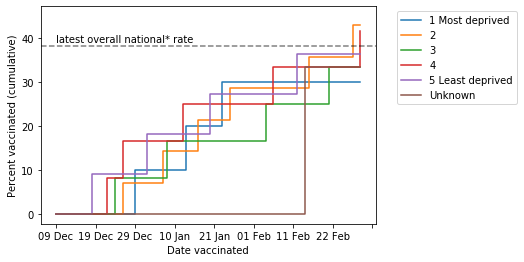

### COVID vaccinations among **shielding (aged 16-69)** population by **LD**

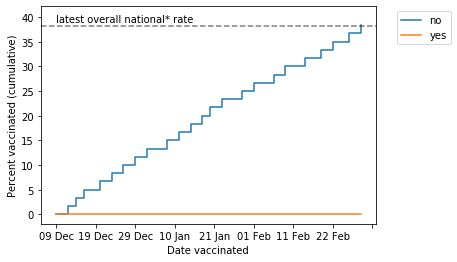

In [21]:
plot_dem_charts(summ_stat_results, df_dict_cum,  formatted_latest_date, pop_subgroups=["80+", "70-79", "65-69","shielding (aged 16-69)"], groups_dict=features_dict,
                groups_to_exclude=["ethnicity_16_groups", "dmards", "chemo_or_radio", "lung_cancer", "cancer_excl_lung_and_haem", "haematological_cancer"],
                savepath=savepath, savepath_figure_csvs=savepath_figure_csvs, suffix=suffix)

## Completeness of ethnicity recording

In [22]:
from data_quality import *

ethnicity_completeness(df=df, groups_of_interest=population_subgroups)


Total **80+** population with ethnicity recorded 5,684 (85.0%)

Total **70-79** population with ethnicity recorded 6,195 (84.7%)

Total **care home** population with ethnicity recorded 973 (84.2%)

Total **shielding (aged 16-69)** population with ethnicity recorded 364 (85.2%)

Total **65-69** population with ethnicity recorded 2,611 (85.4%)

Total **LD (aged 16-64)** population with ethnicity recorded 665 (84.1%)

Total **under 65s, not in other eligible groups shown** population with ethnicity recorded 26,285 (85.1%)